In [1]:
import numpy as np
import sys
import gym
import pylab
from collections import deque
from keras.layers import Dense
from keras.optimizers import Adam
from keras.models import Sequential,load_model
from keras.backend import clear_session
from keras.initializers import he_uniform
import random
from collections import deque
from matplotlib import pyplot as plt 
seed_value = 42

Using TensorFlow backend.
/opt/anaconda3/envs/mlproject/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/mlproject/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/mlproject/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/mlproject/lib/p

In [2]:
class TestAgent:
    def __init__(self, sspace_size, aspace_size,name,task):
        self.sspace_size = sspace_size
        self.aspace_size = aspace_size
        self.primary = self.get_model(name,task) 
        self.visual = False 
        self.name = name
        self.task = task

    def get_model(self,name,task):
        print('DDQN_Final_'+task+'.h5')
        model = load_model('DDQN_Final_'+task+'.h5')
        return model 
    
    def act(self, state):
        state = np.reshape(state, (1, self.sspace_size))
        primary_out = self.primary.predict(state)
        a = np.argmax(primary_out[0])
        return a

In [3]:
def test(model, model_save = False, task='task1'):
    env = gym.make('CartPole-v1')
    env.seed(seed_value) 
    np.random.seed(seed_value)

    MAX_EPISODE_LEN = 500

    agent = TestAgent(env.observation_space.shape[0], env.action_space.n,name=model,task=task)
    score_list = []
    recent_scores = deque(maxlen=100)
    enough = 0

    for ep in range(100):
        done = 0 
        score = 0
        st = env.reset()

        while not done:
            if agent.visual:
                env.render()
            
            if model.endswith('DQN'): 
                at = agent.act(st)
                
            st_, rt, done, info = env.step(at)
            rt = rt if done == 0 or score == MAX_EPISODE_LEN-1 else -100
            

            score += rt 
            st = st_ 

            if score == MAX_EPISODE_LEN:
                done = 1
            
            if done:
                score = score if score == MAX_EPISODE_LEN else score + 100
                score_list.append(score)
                recent_scores.append(score)
                mean_score = np.average(recent_scores)
                print('episode:', ep, 'score:', score, 'mean of recent scores:', mean_score)
                
        
    plt.plot(score_list)
    plt.show()

### Uncomment and Run one of the below for corresponding task's model testing

CartPoleEnv Task1 - Version 0.2.0, Noise case: 1
DDQN_Final_task1.h5
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/opt/anaconda3/envs/mlproject/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/opt/anaconda3/envs/mlproject/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Environment '<class 'gym.envs.classic_control.cartpole.CartPoleEnv'>' has deprecated methods '_step' and '_reset' rather than 'step' and 'reset'. Compatibility code invoked. Set _gym_disable_underscore_compat = True to disable this behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


episode: 0 score: 500.0 mean of recent scores: 500.0
episode: 1 score: 500.0 mean of recent scores: 500.0
episode: 2 score: 500.0 mean of recent scores: 500.0
episode: 3 score: 500.0 mean of recent scores: 500.0
episode: 4 score: 500.0 mean of recent scores: 500.0
episode: 5 score: 500.0 mean of recent scores: 500.0
episode: 6 score: 500.0 mean of recent scores: 500.0
episode: 7 score: 500.0 mean of recent scores: 500.0
episode: 8 score: 500.0 mean of recent scores: 500.0
episode: 9 score: 500.0 mean of recent scores: 500.0
episode: 10 score: 500.0 mean of recent scores: 500.0
episode: 11 score: 500.0 mean of recent scores: 500.0
episode: 12 score: 500.0 mean of recent scores: 500.0
episode: 13 score: 500.0 mean of recent scores: 500.0
episode: 14 score: 500.0 mean of recent scores: 500.0
episode: 15 score: 500.0 mean of recent scores: 500.0
episode: 16 score: 500.0 mean of recent scores: 500.0
episode: 17 score: 500.0 mean of recent scores: 500.0
episode: 18 score: 500.0 mean of recen

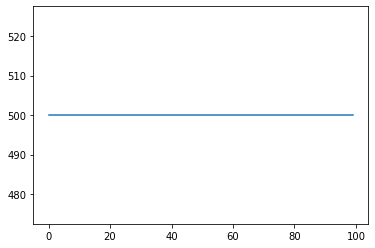

In [4]:
'''Run one of the below for corresponding task's model testing'''

test(model='DDQN', task='task1')
# test(model='DDQN', task='task2')
# test(model='DDQN', task='task3')